In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
np.random.seed(1)

In [6]:
train.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [7]:
num=train.select_dtypes(include=['int64','float64']).columns
cat=train.select_dtypes(include=['O']).columns

In [8]:
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
num=num.drop(['SalePrice'])

In [10]:
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [11]:
nump=train.isna().sum().sort_values(ascending=False)/train.shape[0]*100
nump.head(25)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64

In [12]:
nump.loc[num].sort_values(ascending=False).head(5)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Id              0.000000
WoodDeckSF      0.000000
dtype: float64

In [13]:
nump.loc[cat].sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
Electrical       0.068493
KitchenQual      0.000000
CentralAir       0.000000
Functional       0.000000
HeatingQC        0.000000
dtype: float64

In [14]:
catdrop=nump[(nump.index.isin(cat))&(nump>6)].index
cat=nump[(nump.index.isin(cat))&~(nump>6)].index

In [15]:
cat

Index(['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'Electrical', 'Functional', 'KitchenQual', 'PavedDrive', 'SaleType',
       'SaleCondition', 'HeatingQC', 'LandSlope', 'HouseStyle', 'BldgType',
       'Condition2', 'Condition1', 'Neighborhood', 'LotConfig', 'Utilities',
       'LandContour', 'LotShape', 'Street', 'MSZoning', 'CentralAir',
       'Heating', 'RoofStyle', 'Foundation', 'ExterCond', 'ExterQual',
       'Exterior2nd', 'Exterior1st', 'RoofMatl'],
      dtype='object')

In [16]:
train[cat].shape

(1460, 37)

In [17]:
train[cat].apply(lambda col: col.nunique()).sum()

230

In [18]:
train[cat]

,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,Electrical,...,MSZoning,CentralAir,Heating,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl
0,TA,Attchd,RFn,TA,Unf,No,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
1,TA,Attchd,RFn,TA,Unf,Gd,Gd,TA,ALQ,SBrkr,...,RL,Y,GasA,Gable,CBlock,TA,TA,MetalSd,MetalSd,CompShg
2,TA,Attchd,RFn,TA,Unf,Mn,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
3,TA,Detchd,Unf,TA,Unf,No,TA,Gd,ALQ,SBrkr,...,RL,Y,GasA,Gable,BrkTil,TA,TA,Wd Shng,Wd Sdng,CompShg
4,TA,Attchd,RFn,TA,Unf,Av,Gd,TA,GLQ,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,Gd,VinylSd,VinylSd,CompShg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,Attchd,RFn,TA,Unf,No,Gd,TA,Unf,SBrkr,...,RL,Y,GasA,Gable,PConc,TA,TA,VinylSd,VinylSd,CompShg
1456,TA,Attchd,Unf,TA,Rec,No,Gd,TA,ALQ,SBrkr,...,RL,Y,GasA,Gable,CBlock,TA,TA,Plywood,Plywood,CompShg
1457,TA,Attchd,RFn,TA,Unf,No,TA,Gd,GLQ,SBrkr,...,RL,Y,GasA,Gable,Stone,Gd,Ex,CmentBd,CemntBd,CompShg
1458,TA,Attchd,Unf,TA,Rec,Mn,TA,TA,GLQ,FuseA,...,RL,Y,GasA,Hip,CBlock,TA,TA,MetalSd,MetalSd,CompShg


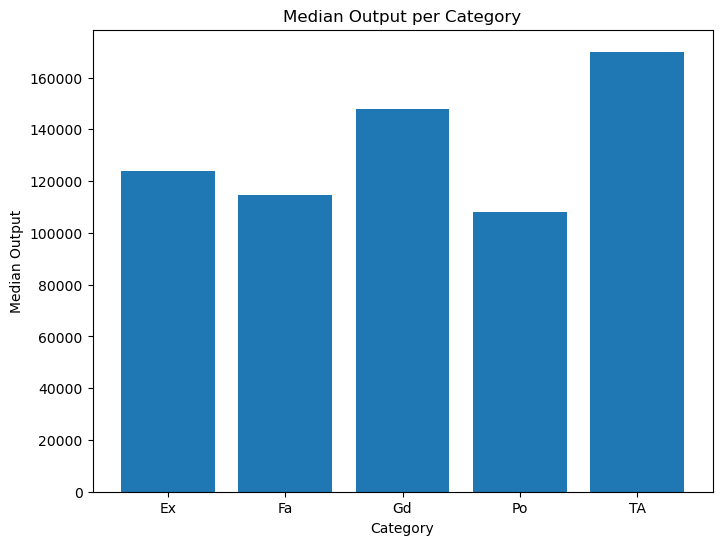

In [19]:
medians = train.groupby('GarageCond')['SalePrice'].median()
plt.figure(figsize=(8, 6))
plt.bar(medians.index, medians.values)
plt.xlabel('Category')
plt.ylabel('Median Output')
plt.title('Median Output per Category')
plt.show()

In [20]:
train[cat]['GarageCond'].nunique()

5

In [21]:
max(train['SalePrice'])

755000

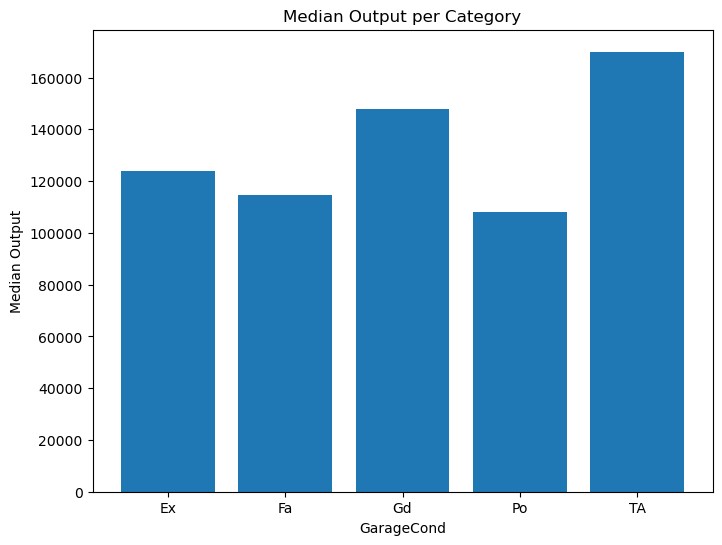

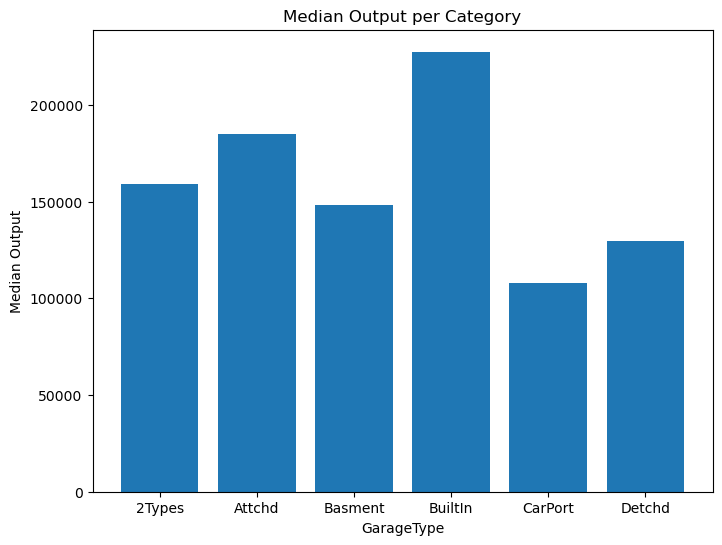

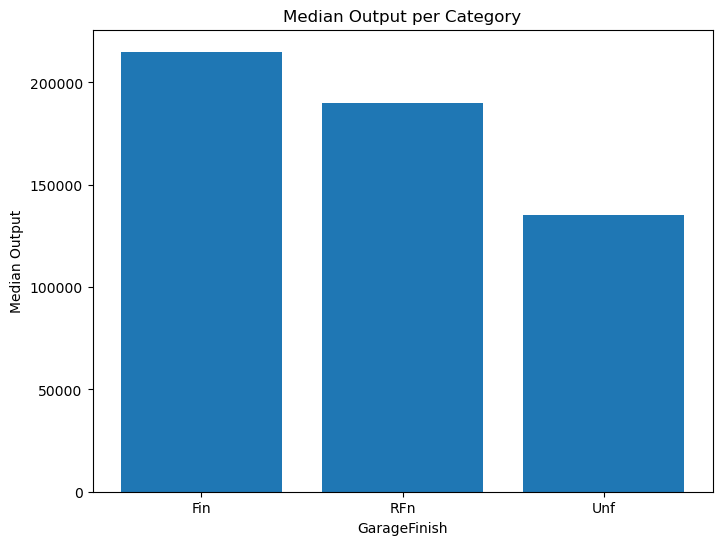

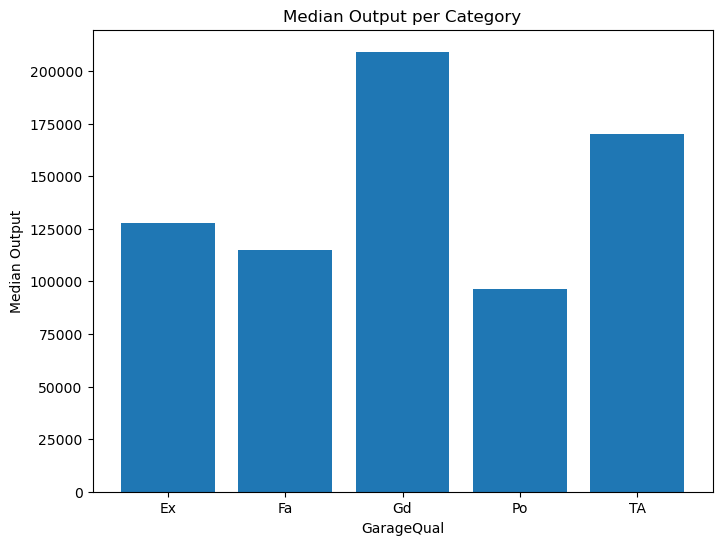

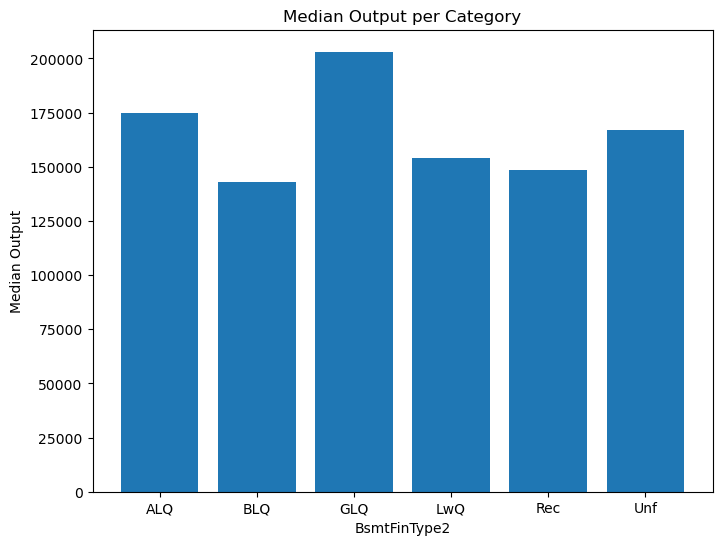

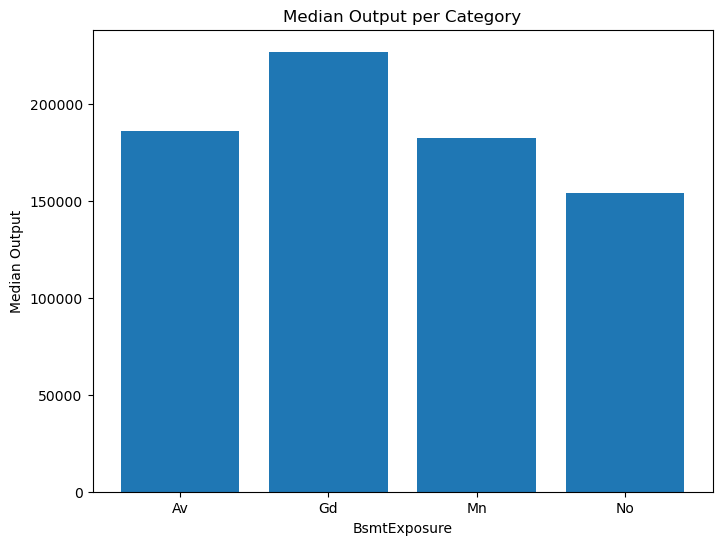

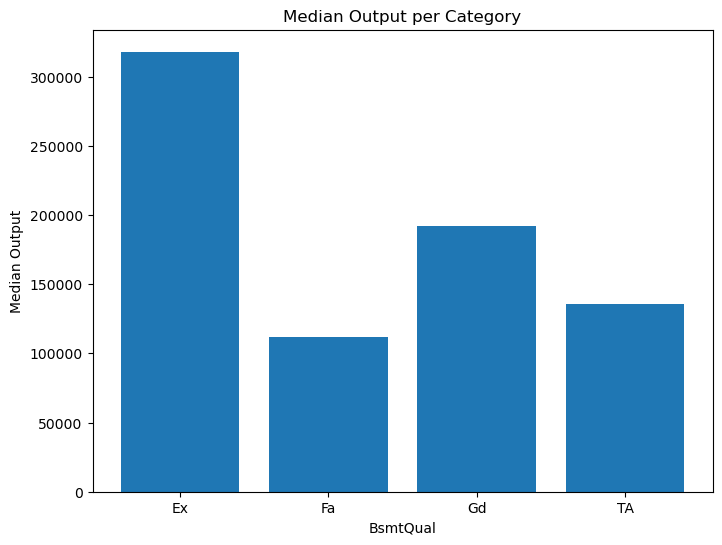

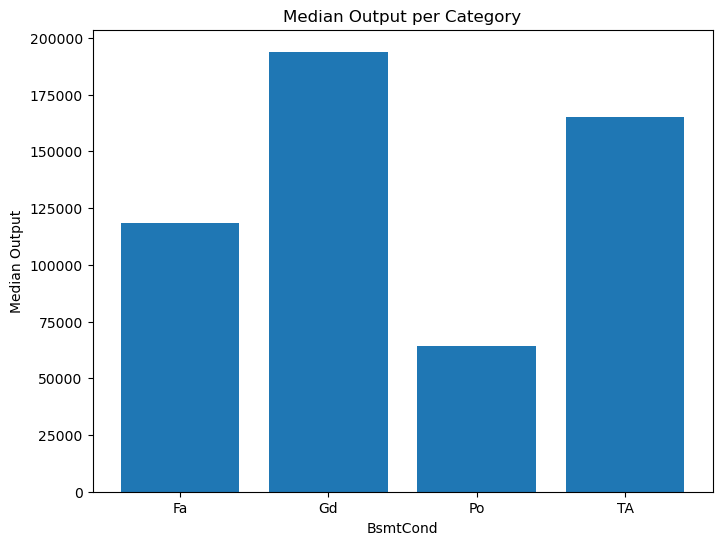

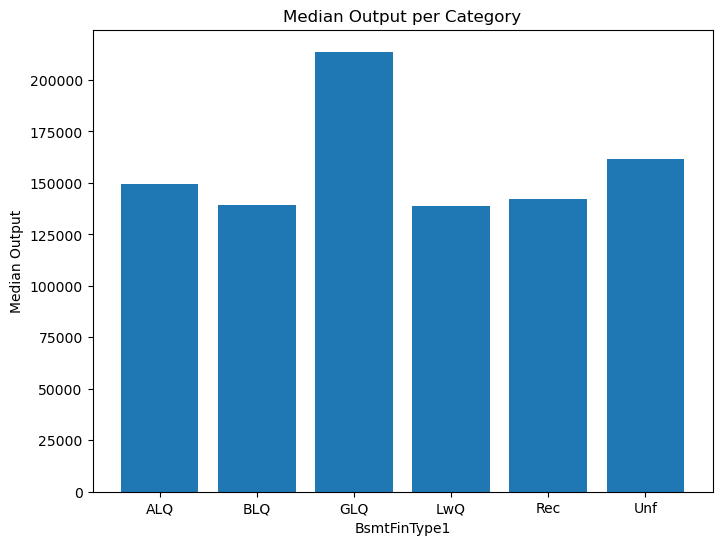

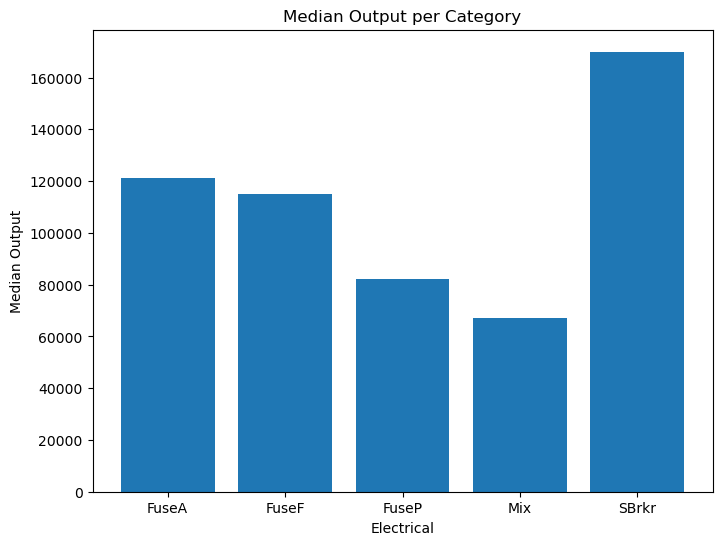

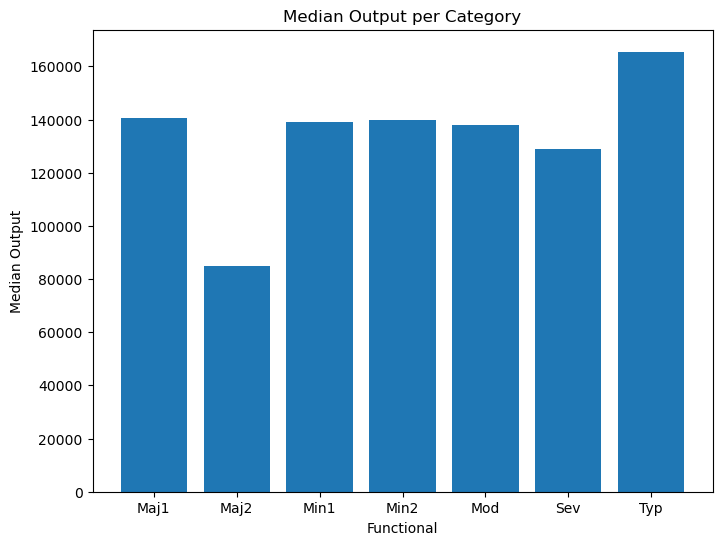

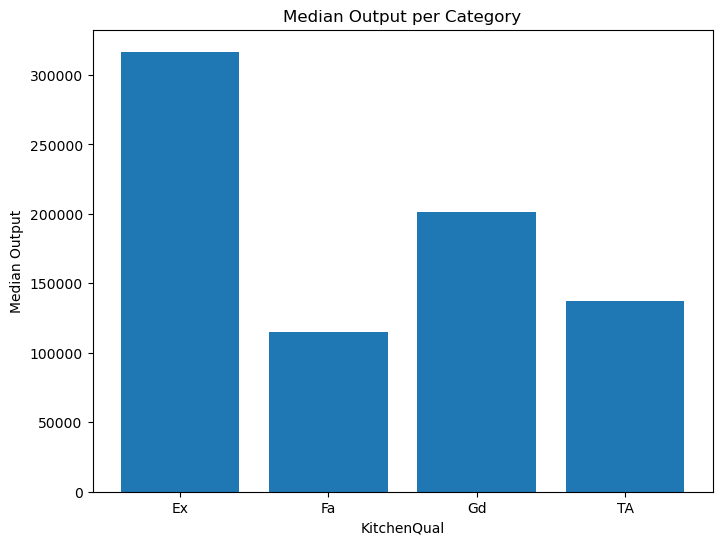

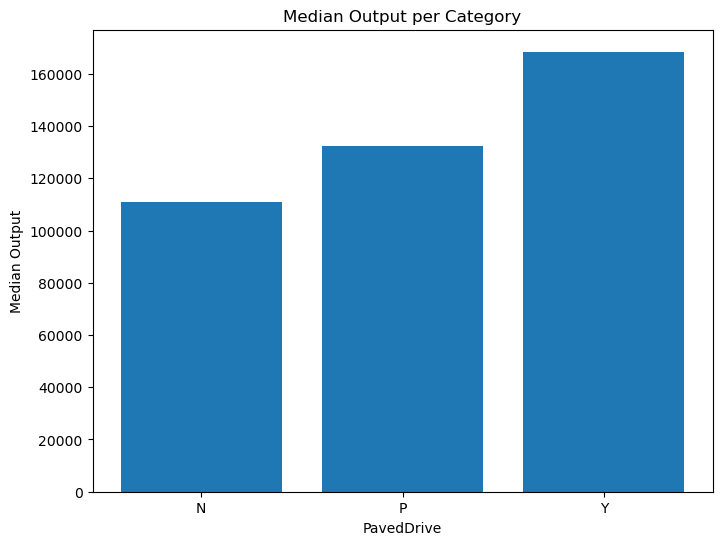

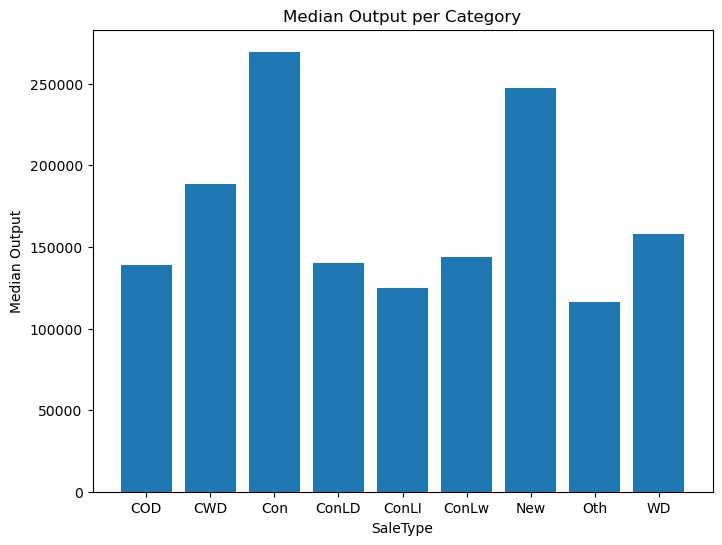

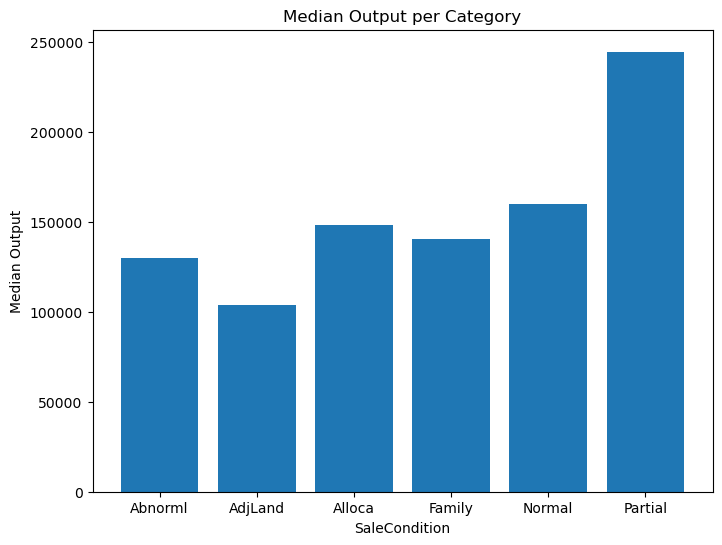

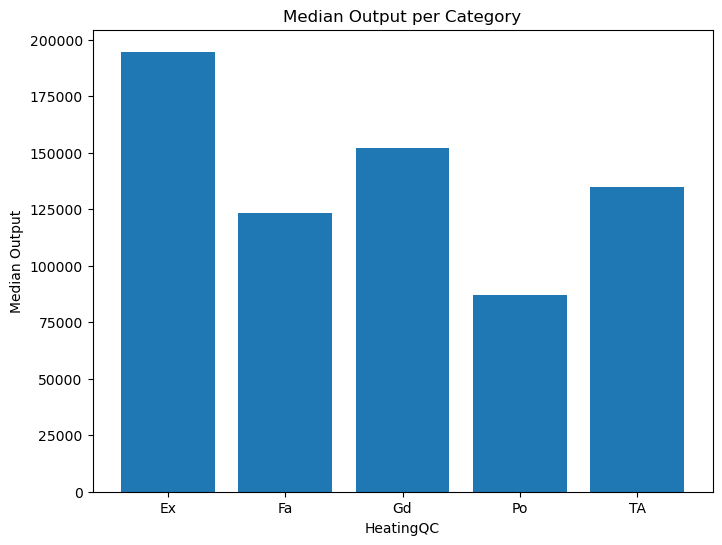

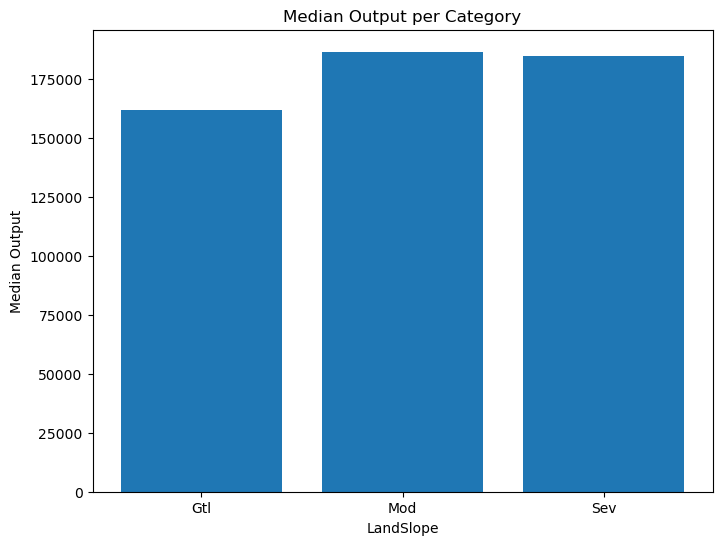

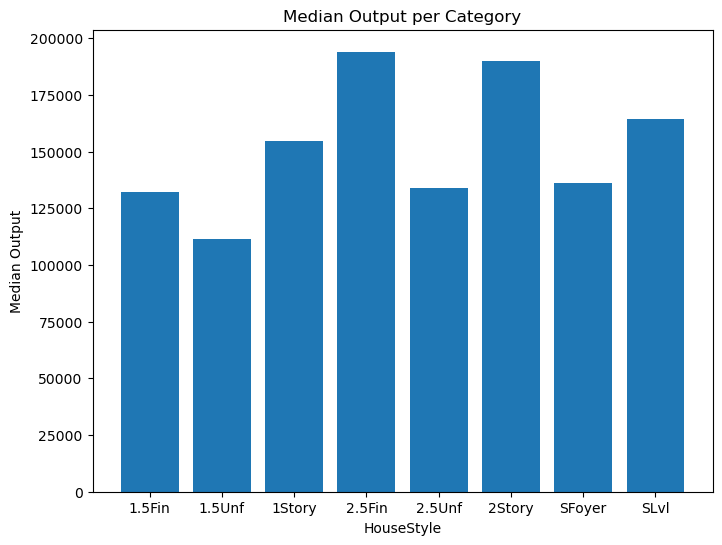

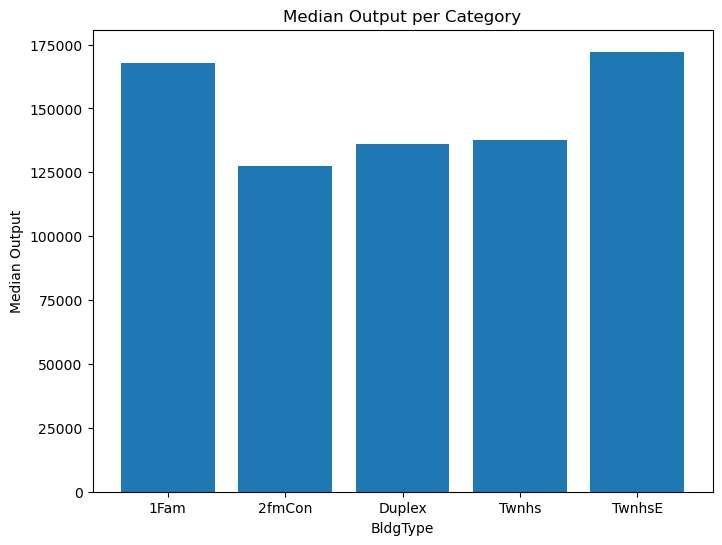

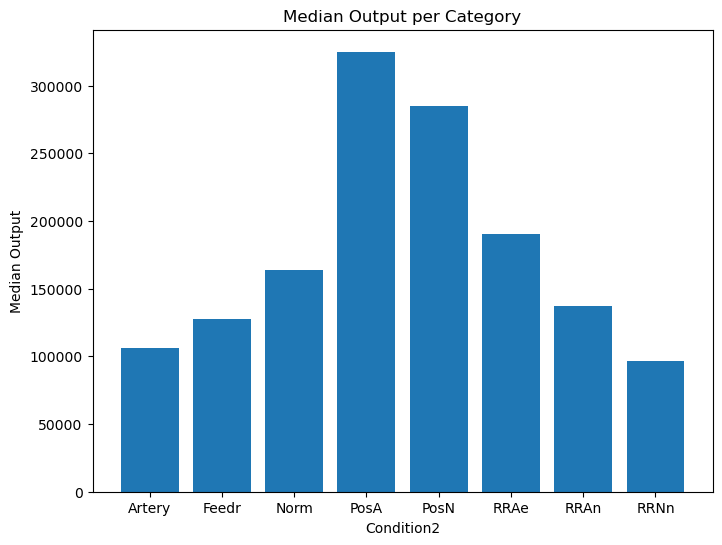

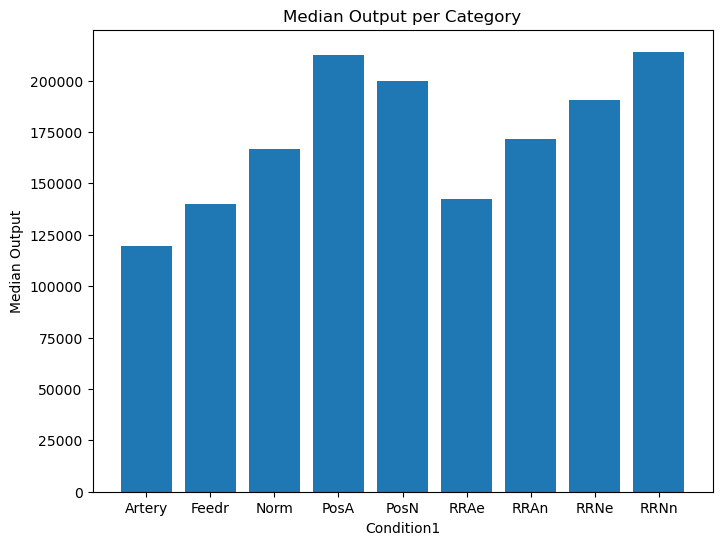

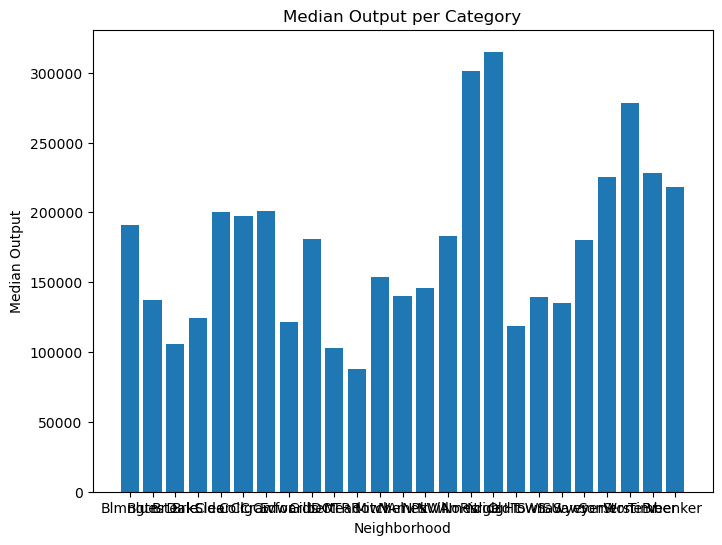

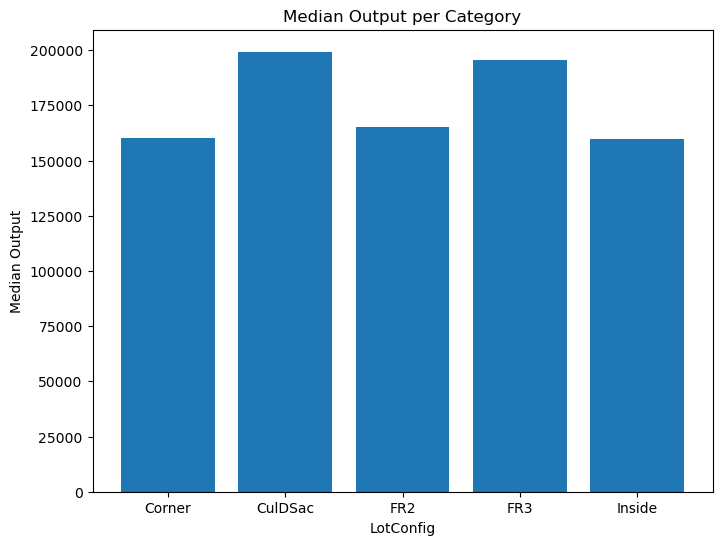

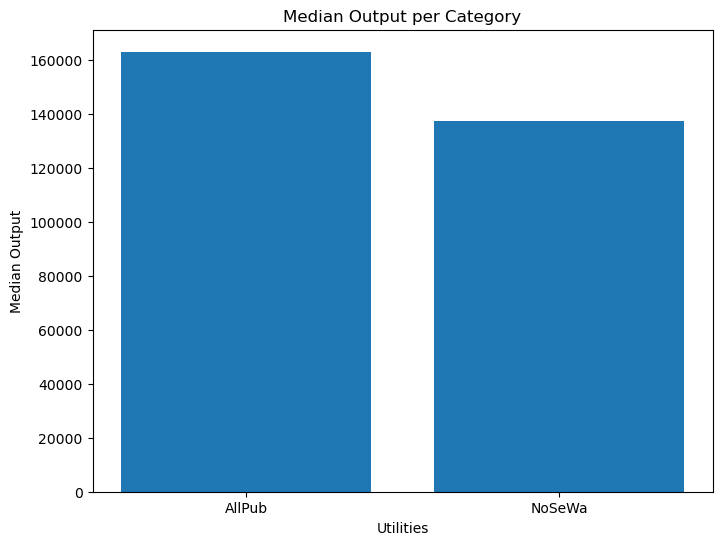

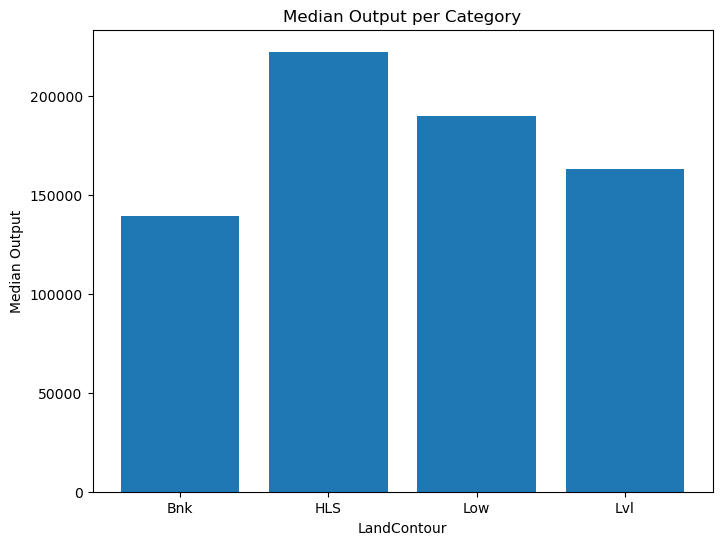

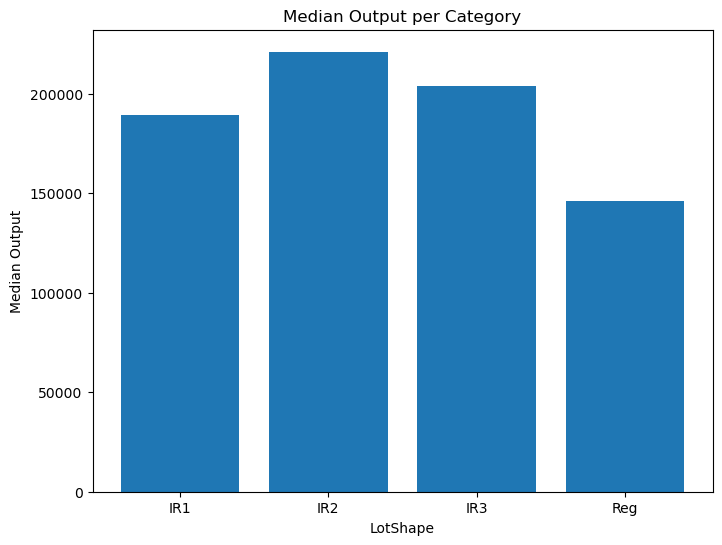

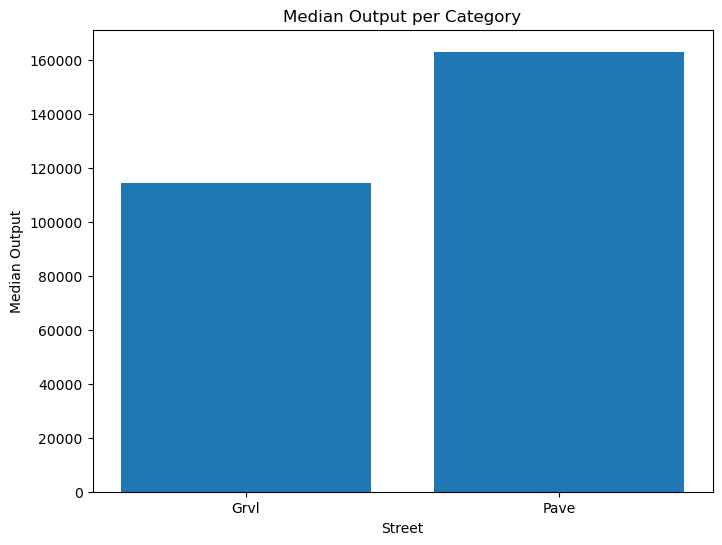

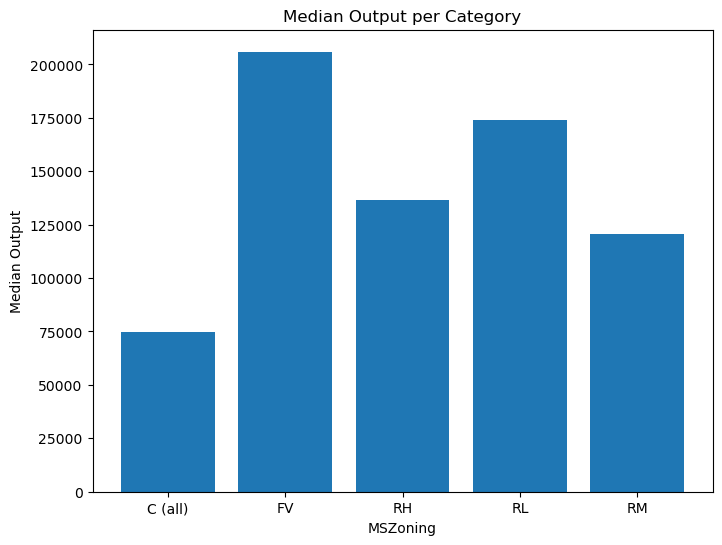

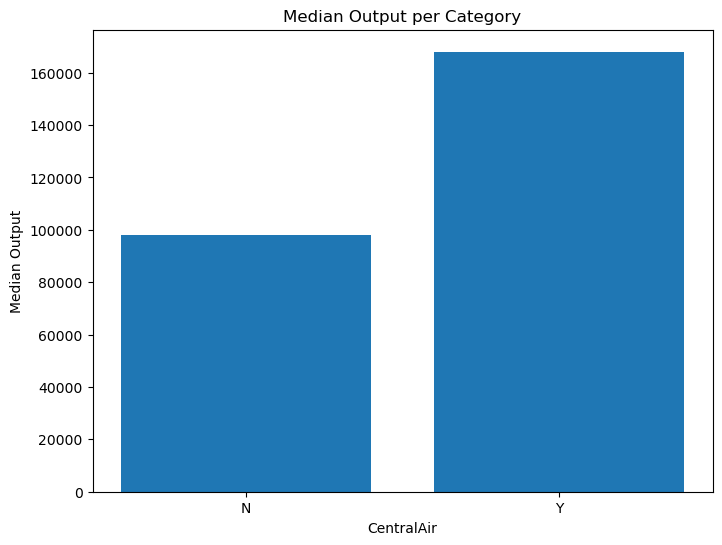

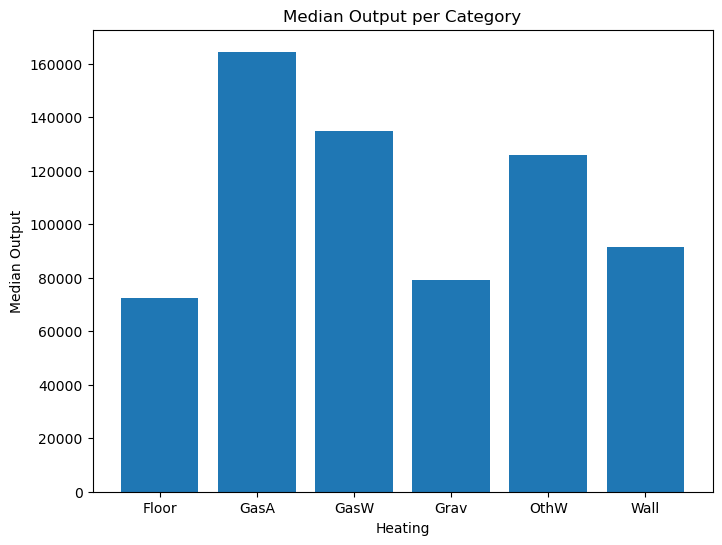

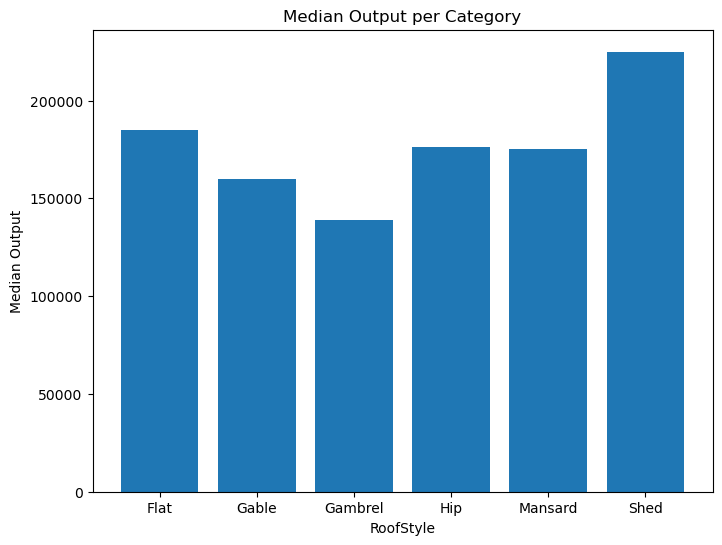

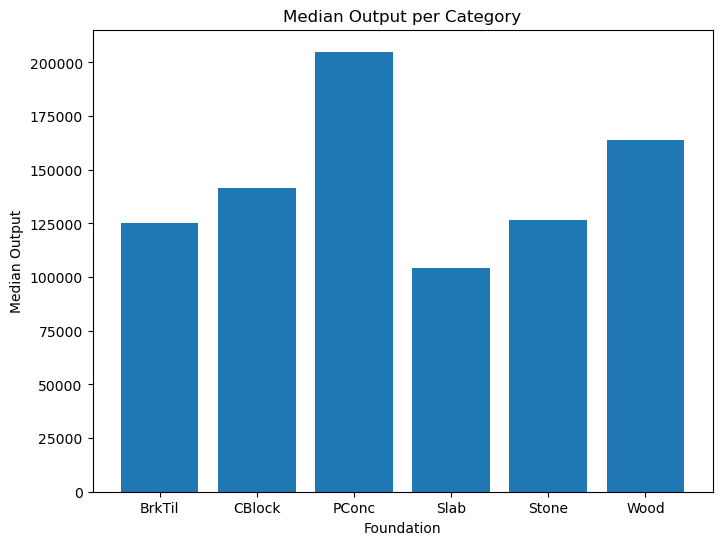

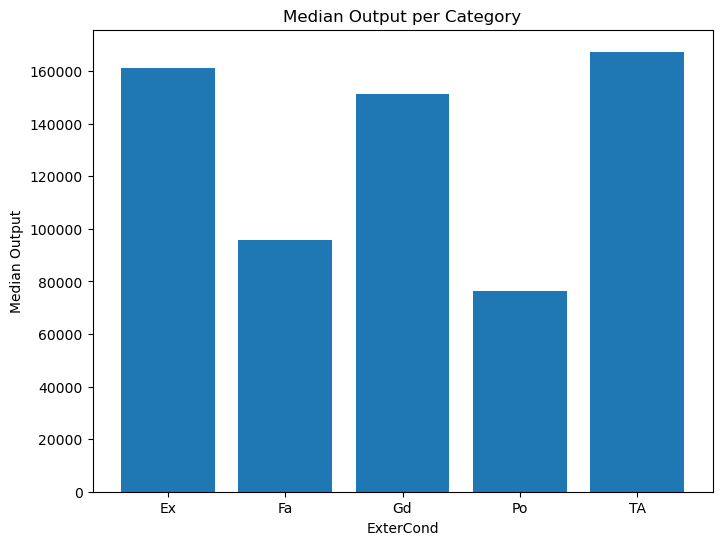

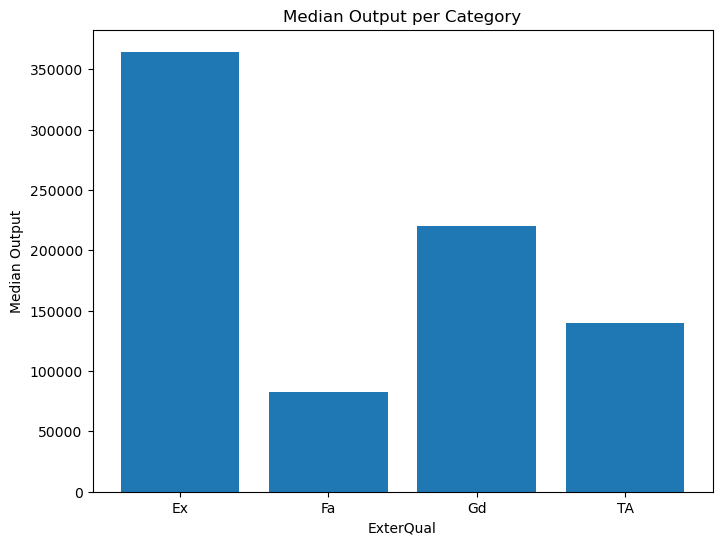

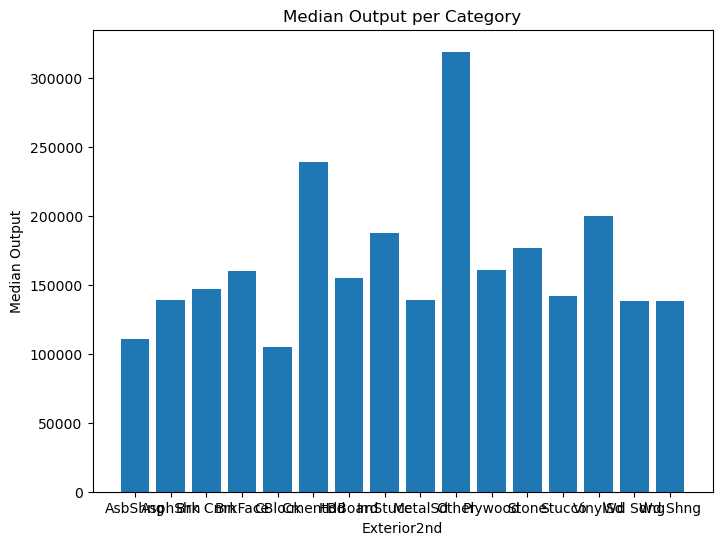

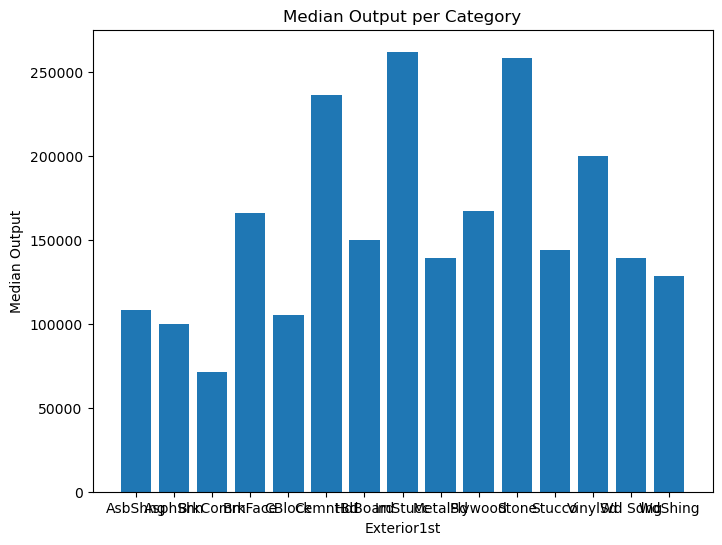

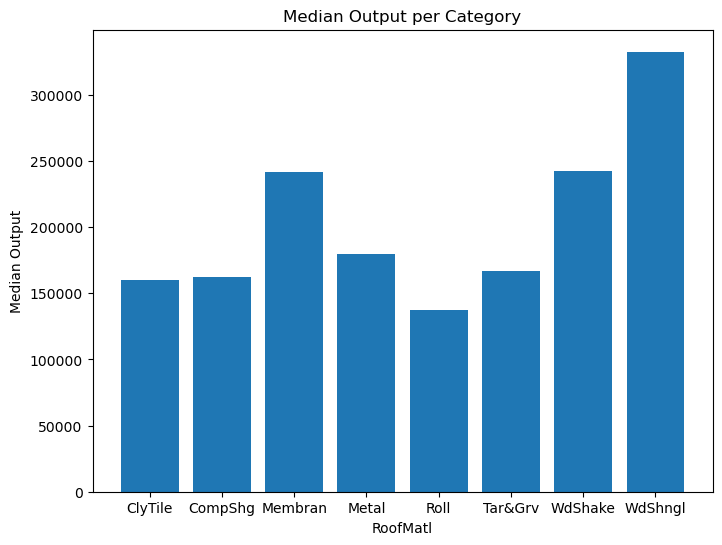

In [22]:
for col in cat:
    medians = train.groupby(col)['SalePrice'].median()
    plt.figure(figsize=(8, 6))
    plt.bar(medians.index, medians.values)
    plt.xlabel(col)
    plt.ylabel('Median Output')
    plt.title('Median Output per Category')
    plt.show()

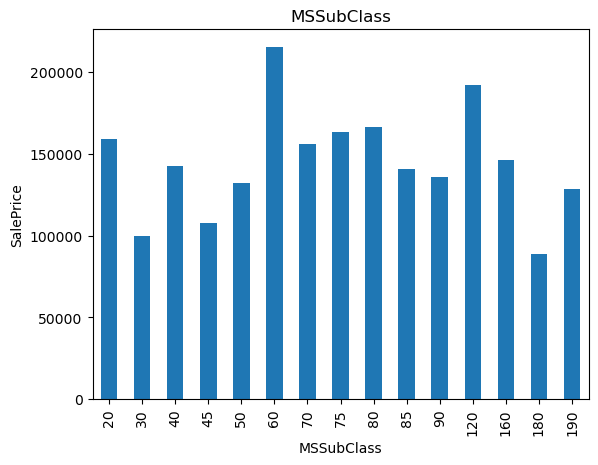

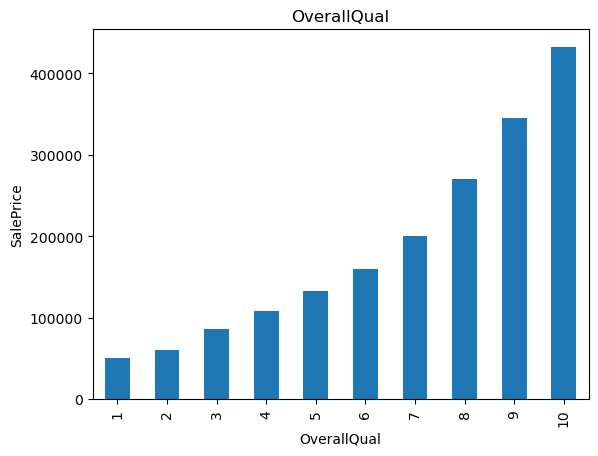

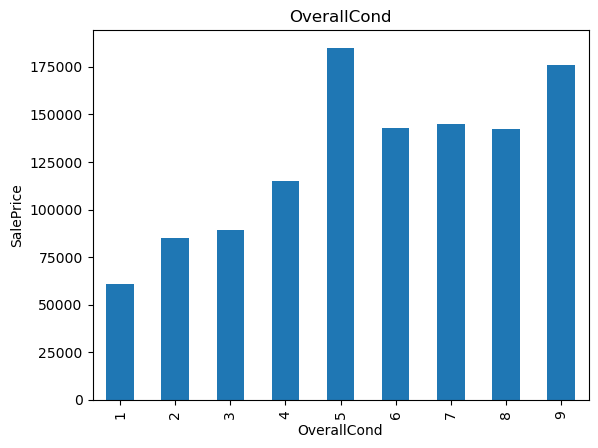

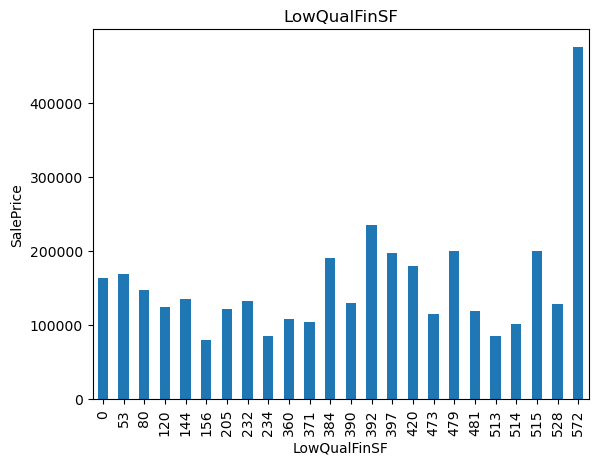

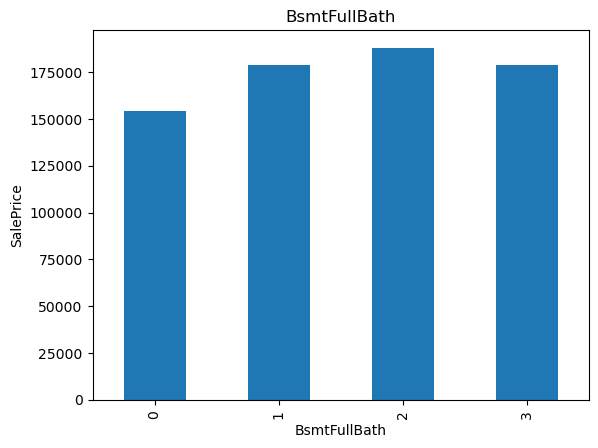

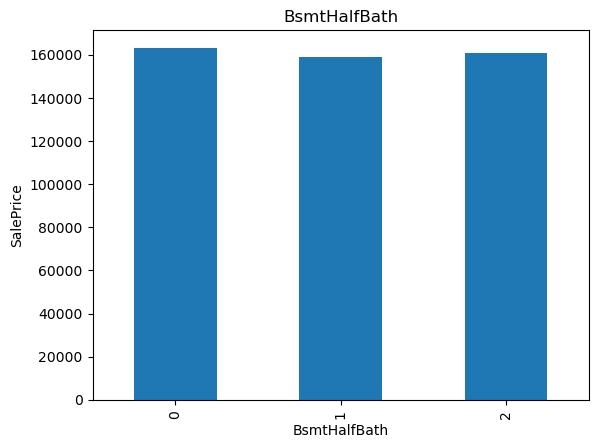

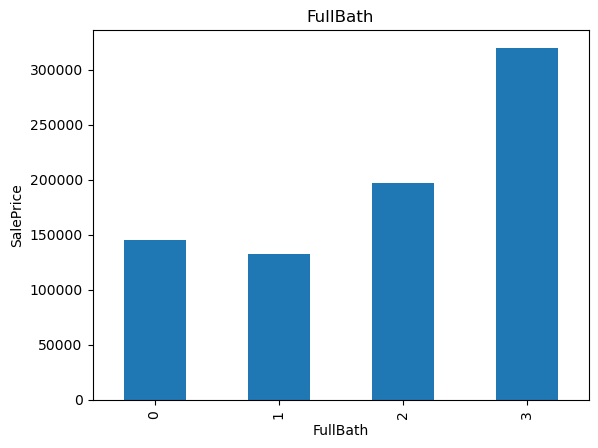

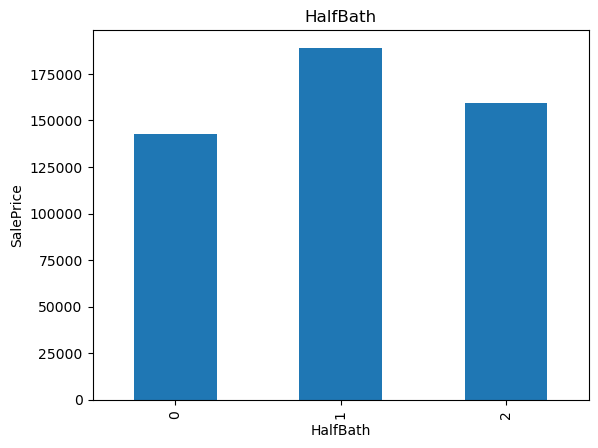

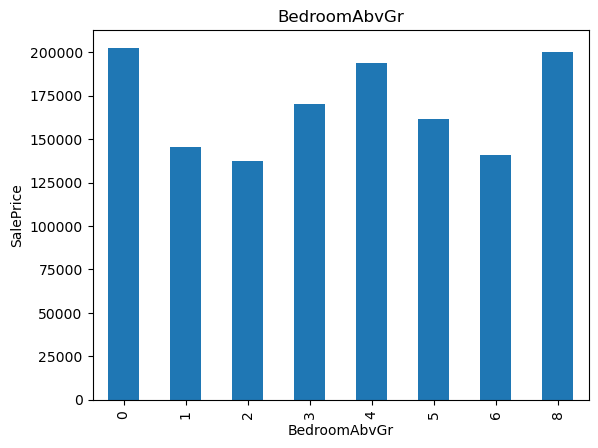

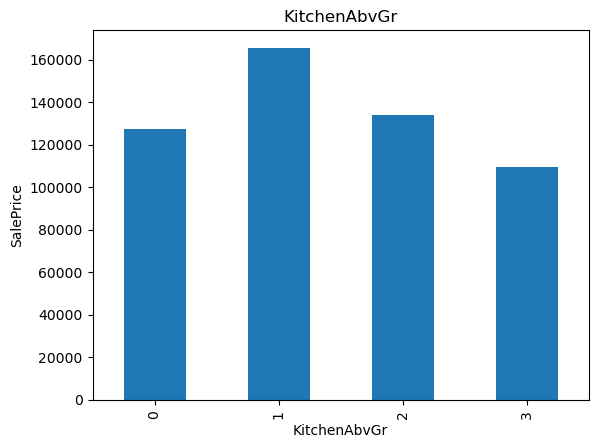

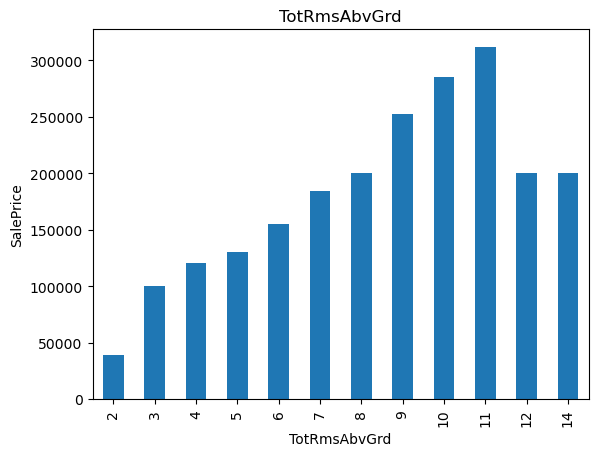

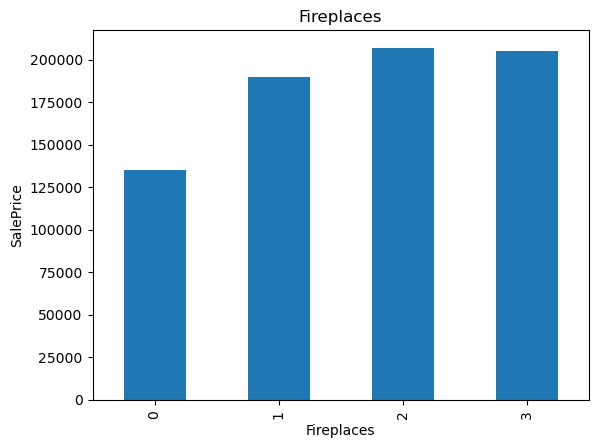

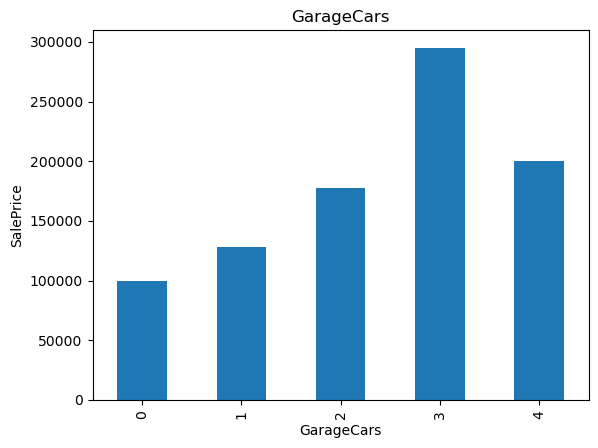

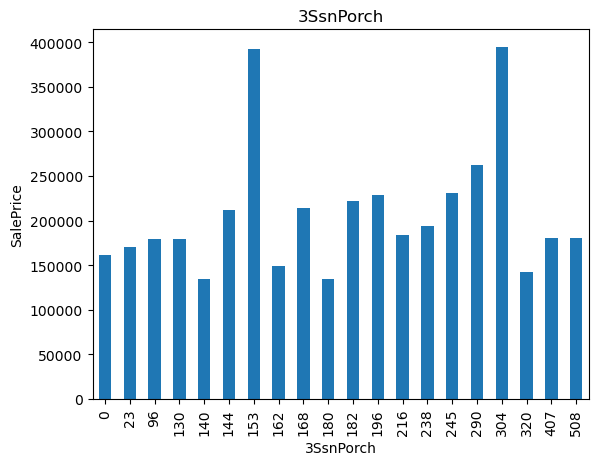

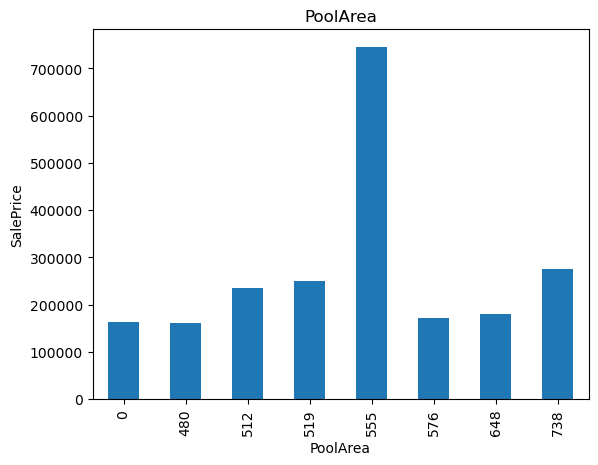

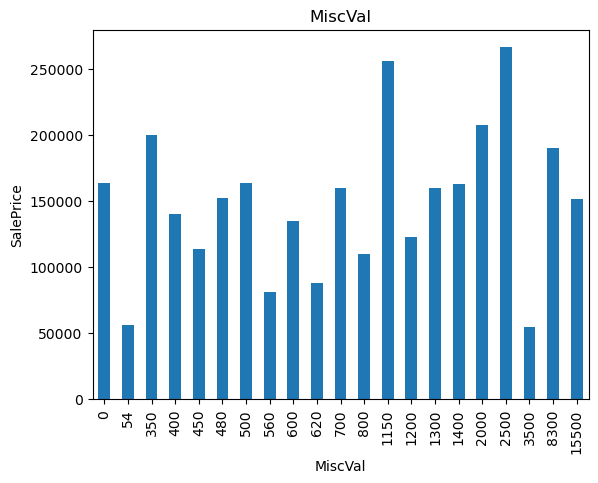

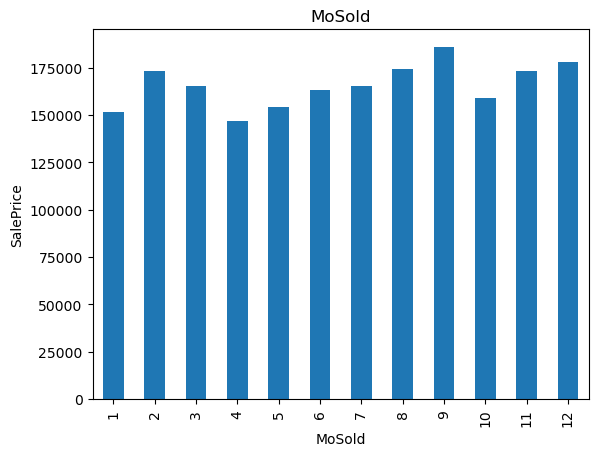

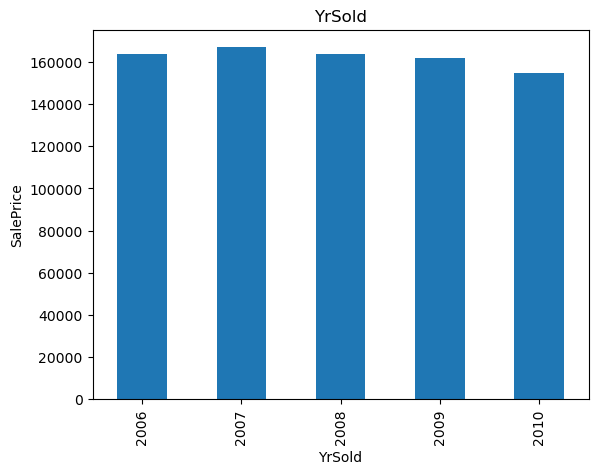

In [23]:
discrete_feature=[feature for feature in num if len(train[feature].unique())<25]
for feature in discrete_feature:    
    data=train.copy()    
    data.groupby(feature)['SalePrice'].median().plot.bar()    
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [24]:
train[cat]['GarageCond'].nunique()

5

In [25]:
from scipy.stats import f_oneway
for col in cat:
    
    grouped_data = train.groupby(col)['SalePrice']

    # Applying ANOVA to the grouped data
    f_statistic, p_value = f_oneway(*[group for name, group in grouped_data])

    print(f"ANOVA results for {col}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

ANOVA results for GarageCond:
F-statistic: 9.54116095061597
P-value: 1.3097143055289643e-07
ANOVA results for GarageType:
F-statistic: 71.5221230789301
P-value: 1.247153670658973e-66
ANOVA results for GarageFinish:
F-statistic: 250.96246721359347
P-value: 1.1991165312294262e-93
ANOVA results for GarageQual:
F-statistic: 9.57038935007985
P-value: 1.2408026478015653e-07
ANOVA results for BsmtFinType2:
F-statistic: 2.702450185378047
P-value: 0.019410089690234594
ANOVA results for BsmtExposure:
F-statistic: 70.88798364989222
P-value: 1.022670629183227e-42
ANOVA results for BsmtQual:
F-statistic: 392.9135064723092
P-value: 9.610615106781709e-186
ANOVA results for BsmtCond:
F-statistic: 14.030600121067247
P-value: 5.136900937703027e-09
ANOVA results for BsmtFinType1:
F-statistic: 67.60217483627738
P-value: 1.8077310066862167e-63
ANOVA results for Electrical:
F-statistic: 23.06767302405713
P-value: 1.6632487814737638e-18
ANOVA results for Functional:
F-statistic: 4.0578754277920215
P-value: 0

In [55]:
train[num].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [58]:
train[cat].isnull().sum()

GarageCond       0
GarageType       0
GarageFinish     0
GarageQual       0
BsmtFinType2     0
BsmtExposure     0
BsmtQual         0
BsmtCond         0
BsmtFinType1     0
Electrical       0
Functional       0
KitchenQual      0
PavedDrive       0
SaleType         0
SaleCondition    0
HeatingQC        0
LandSlope        0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
MSZoning         0
CentralAir       0
Heating          0
RoofStyle        0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
dtype: int64

In [56]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [57]:
for i in train.columns:
    if train[i].isnull().sum():
        mode_value = train[i].mode()[0]
        train[i] = train[i].fillna(mode_value)

In [62]:
X=train.drop(['Id','SalePrice'],axis=1)
y=train['SalePrice']

In [107]:
import xgboost
regressor=xgboost.XGBRegressor()

In [108]:
booster=['gbtree','gblinear']
basescore=[0.25,0.5,0.75,1]

In [109]:
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
paramgrid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'basescore':basescore
}

In [110]:
from sklearn.model_selection import RandomizedSearchCV
randomcv=RandomizedSearchCV(estimator=regressor,
                           param_distributions=paramgrid,
                           cv=5, n_iter=50,
                           scoring='neg_mean_absolute_error',n_jobs=4,
                           verbose=5,
                           return_train_score=True,
                           random_state=42)

In [111]:
cols=train[cat].columns

In [112]:
len(cols)

37

In [113]:
train[cat].nunique()

GarageCond        5
GarageType        6
GarageFinish      3
GarageQual        5
BsmtFinType2      6
BsmtExposure      4
BsmtQual          4
BsmtCond          4
BsmtFinType1      6
Electrical        5
Functional        7
KitchenQual       4
PavedDrive        3
SaleType          9
SaleCondition     6
HeatingQC         5
LandSlope         3
HouseStyle        8
BldgType          5
Condition2        8
Condition1        9
Neighborhood     25
LotConfig         5
Utilities         2
LandContour       4
LotShape          4
Street            2
MSZoning          5
CentralAir        2
Heating           6
RoofStyle         6
Foundation        6
ExterCond         5
ExterQual         4
Exterior2nd      16
Exterior1st      15
RoofMatl          8
dtype: int64

In [114]:
import pandas as pd

# Assuming train[cat] contains all categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(train[categorical_columns], drop_first=True)

# Combine one-hot encoded columns with the original train data
train_encoded = pd.concat([train.drop(columns=categorical_columns), one_hot_encoded], axis=1)


In [115]:
randomcv.fit(train_encoded,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'basescore': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [116]:
train_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [118]:
randomcv.best_estimator_

XGBRegressor(base_score=None, basescore=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, ...)

In [140]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=-999, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [141]:
regressor.fit(train_encoded,y)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=1, missing=-999,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [142]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [144]:
train_encoded_filled = train_encoded.fillna(-999)                                   
y_pred = regressor.predict(train_encoded_filled)
y_pred

array([202252.36, 179285.42, 209437.69, ..., 270484.2 , 144188.02,
       143497.81], dtype=float32)